In [ ]:
import dynamic_backtesting as db
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
plt.style.use('seaborn')
matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=["grey", "green", "black", "deepskyblue", "orange", "lime", "purple", "Gold", "brown", "blue", "pink"]) 

In [ ]:
assets = {"EEM": "Emerging Markets",
           "IVV": "S&P 500",
           "IEV": "MSCI Europe",
           "IXN": "Global Tech",
           "IYR": "US Real Estate",
           "IXG": "Global Financials",
           "EXI": "Global Industrials",
           "GC=F": "Gold Futures", 
           "BZ=F": "Brent Crude Oil Futures",
           "HYG": "High-Yield Corporate Bonds",
           "TLT": "20+ Year Treasury Bonds"}
tickers = list(assets.keys())
stocks = tickers[:7]
commodities = tickers[7:9]
bonds = tickers[9:]

**Finder vægter for de tre typer UGARCH modeller**

In [ ]:
v_t_ARCH, out_of_sample_s_ARCH, in_sample_s_ARCH = db.garch_no_trading_cost(tickers, number_of_out_of_sample_days=4*250, model_type="sGARCH10")
v_t_GARCH, out_of_sample_s_GARCH, in_sample_s_GARCH = db.garch_no_trading_cost(tickers, number_of_out_of_sample_days=4*250, model_type="sGARCH11")
v_t_GJR, out_of_sample_s_GJR, in_sample_s_GJR = db.garch_no_trading_cost(tickers, number_of_out_of_sample_days=4*250, model_type="gjrGARCH11")

**Udregner performance**

In [ ]:
res_ARCH, perf_table_ARCH = db.compare_strategies(v_t_ARCH, out_of_sample_s_ARCH)
res_GARCH, perf_table_GARCH = db.compare_strategies(v_t_GARCH, out_of_sample_s_GARCH)
res_GJR, perf_table_GJR = db.compare_strategies(v_t_GJR, out_of_sample_s_GJR)


**Sammensætter til en tabel**

In [100]:
perf_table=perf_table_ARCH.iloc[0:1,]
perf_table=perf_table.rename(index={'GARCH no trading costs':'ARCH(1)'})
perf_table=perf_table.append(perf_table_GARCH.iloc[0:1,])
perf_table=perf_table.rename(index={'GARCH no trading costs':'GARCH(1,1)'})
perf_table=perf_table.append(perf_table_GJR.iloc[0:1,])
perf_table=perf_table.rename(index={'GARCH no trading costs':'GJR-GARCH(1,1)'})
perf_table=perf_table.append(perf_table_GJR.iloc[1:,])
perf_table=perf_table.rename(index={'BnH':'Buy and hold'})

**Laver en tabel af afkast**

In [101]:
res=res_ARCH.drop(columns=['Equal weight', 'BnH']).rename(columns={'GARCH no trading costs':'ARCH(1)'})
res["GARCH(1,1)"]=res_GARCH["GARCH no trading costs"]
res["GJR-GARCH(1,1)"]=res_GJR["GARCH no trading costs"]
res["Equal weight"]=res_GJR["Equal weight"]
res["Buy and hold"]=res_GJR["BnH"]

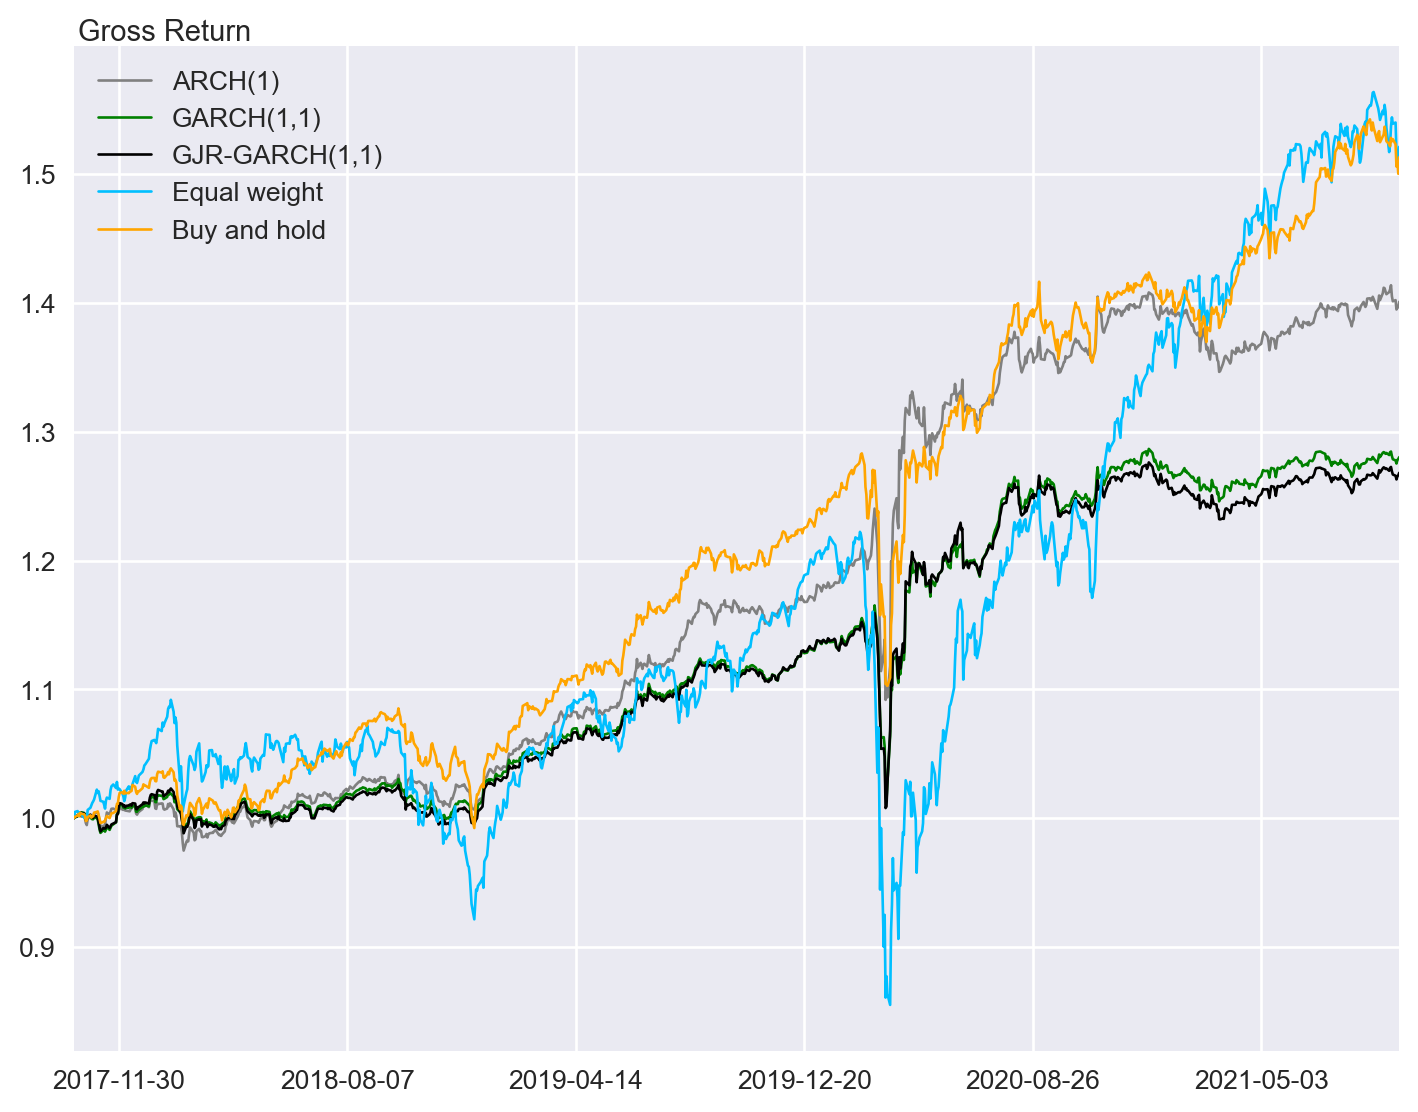

In [109]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(res,label=res.columns,linewidth=1)
ax.margins(0,0.05)
ax.legend(res.columns)
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Gross Return',loc='top', rotation = 0, labelpad = -88) 
fig.savefig("Backtesting\Performance_no_TC.png", bbox_inches = 'tight', pad_inches = 0.1)


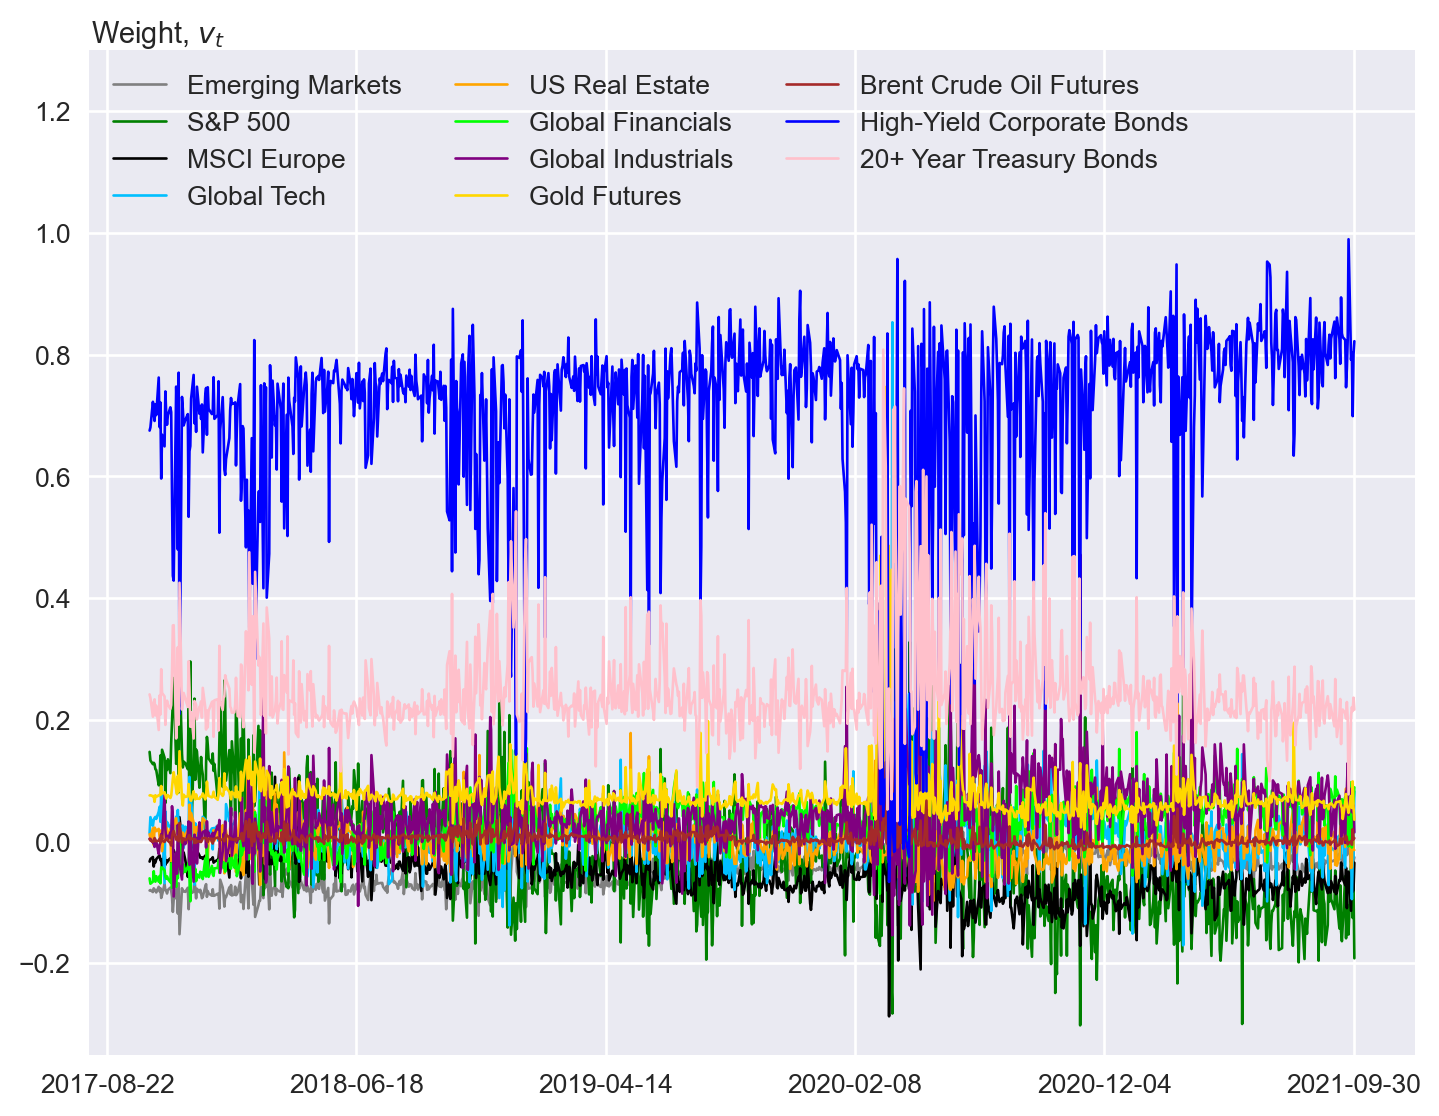

In [119]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(v_t_ARCH,linewidth=1)
ax.set_ylim(-0.35,1.3)
ax.legend(assets.values(),ncol=3,loc="upper left")
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Weight, $v_t$',loc='top', rotation = 0, labelpad = -78) 
fig.savefig("Backtesting\ARCH_weight.png", bbox_inches = 'tight', pad_inches = 0.1)

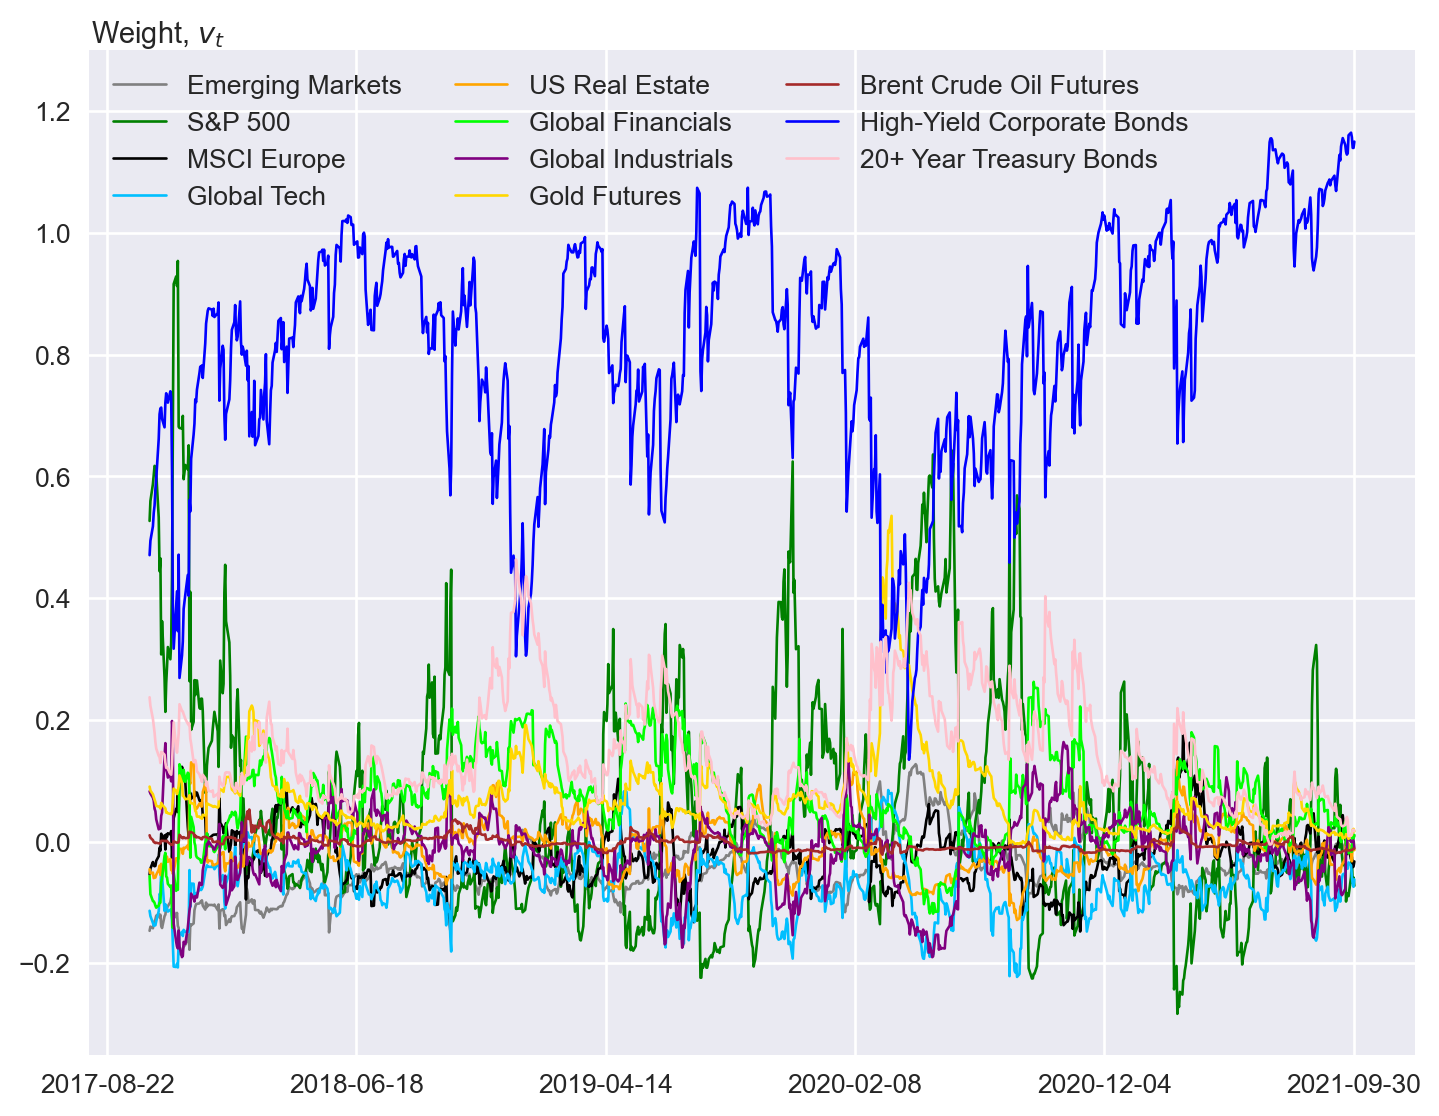

In [118]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(v_t_GARCH,linewidth=1)
ax.set_ylim(-0.35,1.3)
ax.legend(assets.values(),ncol=3,loc="upper left")
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Weight, $v_t$',loc='top', rotation = 0, labelpad = -78) 
fig.savefig("Backtesting\GARCH_weight.png", bbox_inches = 'tight', pad_inches = 0.1)

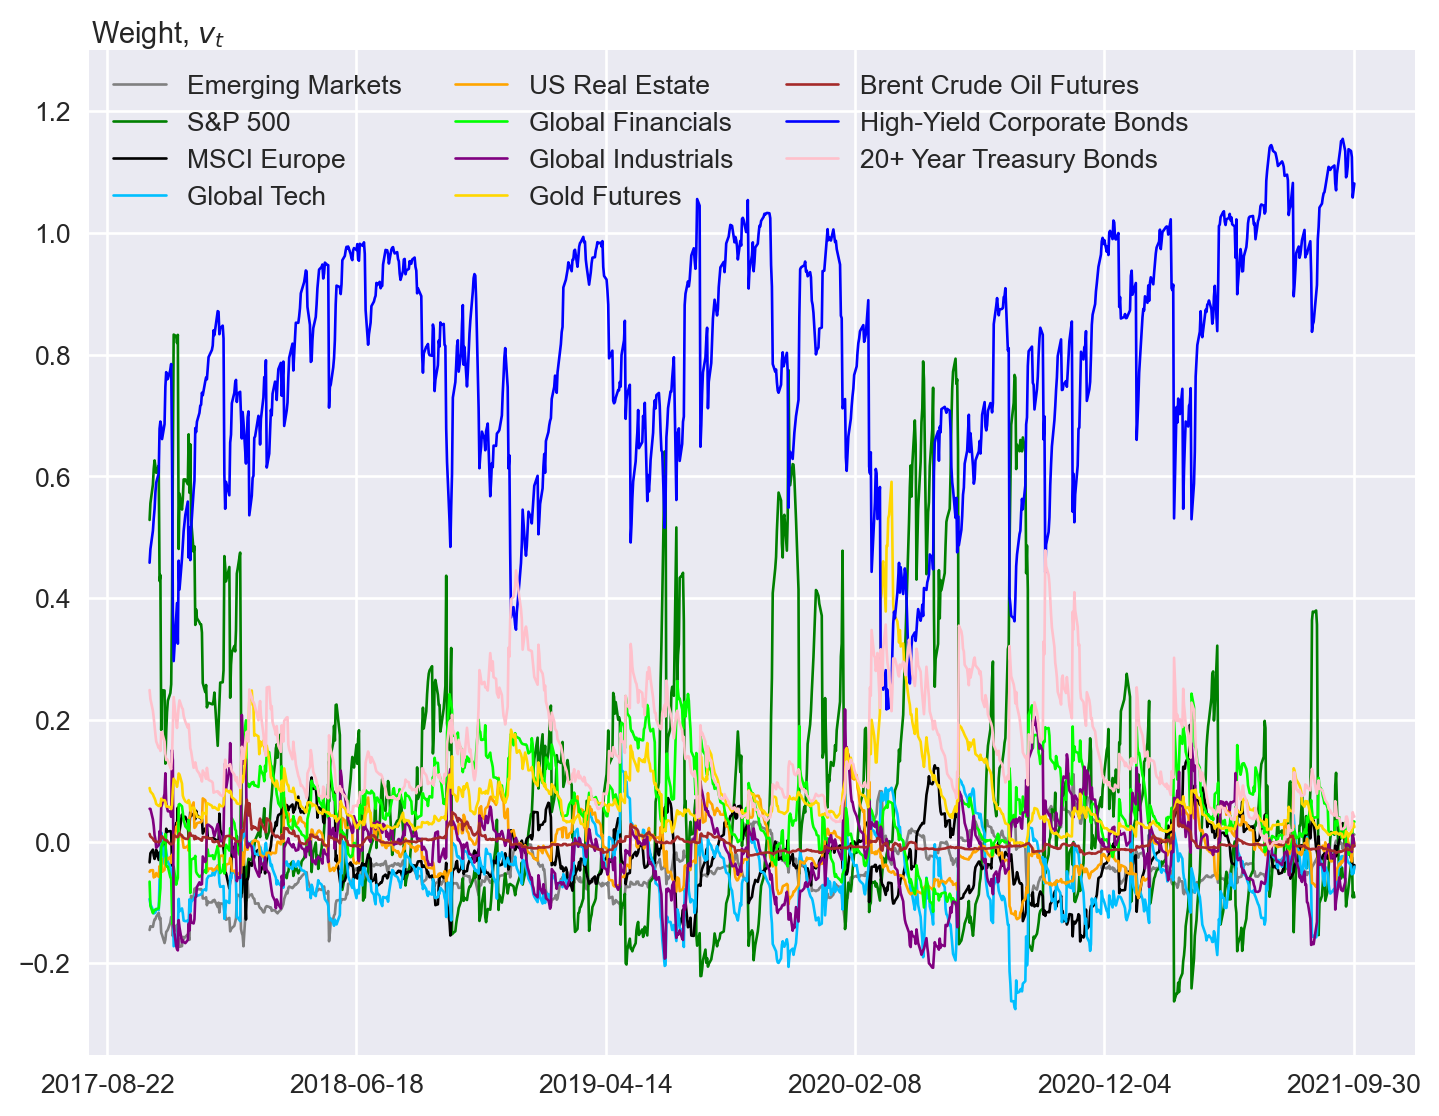

In [117]:
fig, ax = plt.subplots(1, 1, figsize=(9,7), dpi=190)
ax.plot(v_t_GJR,linewidth=1)
ax.set_ylim(-0.35,1.3)
ax.legend(assets.values(),ncol=3,loc="upper left")
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
ax.set_ylabel('Weight, $v_t$',loc='top', rotation = 0, labelpad = -78) 
fig.savefig("Backtesting\GJRGARCH_weight.png", bbox_inches = 'tight', pad_inches = 0.1)